In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data is about predicting housing price (medv) in
Boston city, features:


- Criminal rate (crim)
- Residential land zoned proportion (zn)
- Non-retail business acres proportion (indus)
- Is bounds with river (chas)
- Nitrogen oxides concentration (nox)
- Number rooms average (rm)
- Owner age proportion (age)
- Weighted distance to cities (dis)
- Accessibility index (rad)
- Tax rate (tax)
- Pupil-teacher ratio (ptratio)
- Black proportion (black)
- Percent lower status (lstat)

In [2]:
url = 'https://raw.githubusercontent.com/pararawendy/dibimbing-materials/main/boston.csv'

data = pd.read_csv(url)

In [3]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#Testing

In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Split Data into Train-Validate-Test

In [5]:
from sklearn.model_selection import train_test_split

feature = data.drop(data.columns[-1], axis=1)
target = data.iloc[:,-1]

feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [6]:
feature_train, feature_val, target_train, target_val = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

# Multicollinearity, VIF, Feature Selection

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X_constant = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X_constant.values, i) 
               for i in range(X_constant.shape[1])], 
              index=X_constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


High VIF : indus, nox, age, dis, rad, tax, lstat

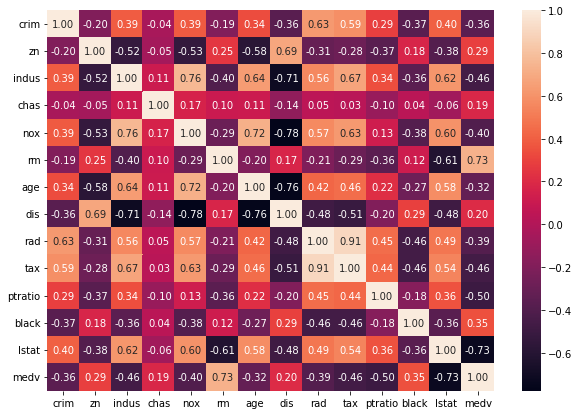

In [8]:
data_train = pd.concat([feature_train, target_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

##Drop some columns

In [9]:
feature_train = feature_train.drop(columns=['indus', 'nox', 'age', 'dis', 'rad'])
feature_test = feature_test.drop(columns=['indus', 'nox', 'age', 'dis', 'rad'])
feature_val = feature_val.drop(columns=['indus', 'nox', 'age', 'dis', 'rad'])

In [10]:
X_constant = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X_constant.values, i) 
               for i in range(X_constant.shape[1])], 
              index=X_constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.582193
2,zn,1.277315
3,chas,1.045116
4,rm,1.722866
5,tax,2.162562
6,ptratio,1.444919
7,black,1.342169
8,lstat,2.313710


# Linear Regression Baseline

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

#validation
X_val = feature_val.to_numpy()
y_val = target_val.to_numpy()
y_val = y_val.reshape(len(y_val),)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val,y_pred_val))
print(f'RMSE of Linear regression model  is {rmse}')

RMSE of Linear regression model  is 5.072037994992038


In [12]:
coef_df_linear = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lr.intercept_] + list(lr.coef_)
})

coef_df_linear

,feature,coefficient
0,intercept,3.481221
1,crim,-0.051037
2,zn,-0.020126
3,chas,3.221401
4,rm,5.654254
5,tax,0.000585
6,ptratio,-0.842611
7,black,0.013224
8,lstat,-0.459381


# Ridge Regression

## Model Training

In [13]:
from sklearn.linear_model import Ridge

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error

X_val = feature_val.to_numpy()
y_val = target_val.to_numpy()
y_val = y_val.reshape(len(y_val),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred_val))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 5.07195328369249
RMSE of Ridge regression model with alpha = 0.1 is 5.0711933991674965
RMSE of Ridge regression model with alpha = 1.0 is 5.063832499259421
RMSE of Ridge regression model with alpha = 10 is 5.006912568629597


## Coefficient Tour

In [15]:
model = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.485878
1,crim,-0.051038
2,zn,-0.020128
3,chas,3.219970
4,rm,5.653742
5,tax,0.000585
6,ptratio,-0.842664
7,black,0.013224
8,lstat,-0.459420


In [16]:
model = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.527745
1,crim,-0.051043
2,zn,-0.020147
3,chas,3.207149
4,rm,5.649134
5,tax,0.000590
6,ptratio,-0.843135
7,black,0.013222
8,lstat,-0.459772


In [17]:
model = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.942081
1,crim,-0.051084
2,zn,-0.020323
3,chas,3.084590
4,rm,5.603348
5,tax,0.000637
6,ptratio,-0.847720
7,black,0.013208
8,lstat,-0.463247


In [18]:
model = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,7.694064
1,crim,-0.050965
2,zn,-0.021526
3,chas,2.243514
4,rm,5.176807
5,tax,0.000980
6,ptratio,-0.884033
7,black,0.013026
8,lstat,-0.494382


## Model Evaluation

In [19]:
ridge_best = ridge_reg_ten

coef_df_ridge = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df_ridge

,feature,coefficient
0,intercept,7.694064
1,crim,-0.050965
2,zn,-0.021526
3,chas,2.243514
4,rm,5.176807
5,tax,0.000980
6,ptratio,-0.884033
7,black,0.013026
8,lstat,-0.494382


## Diagnostic Study

### R2 Score

In [20]:
from sklearn.metrics import r2_score

y_pred_train = ridge_best.predict(X_train)

print('R-squared for training data is {}'.format(r2_score(y_pred_train, y_train)))

R-squared for training data is 0.6117577086806931


### Residual Plot

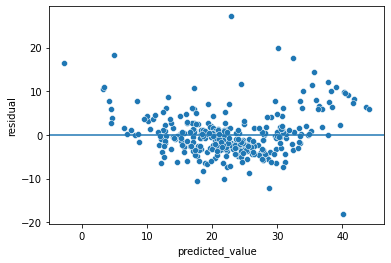

In [21]:
# calculate residuals
residual = y_train - y_pred_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_pred_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

## Training Error

In [22]:
# prepare prediction result on train data
y_pred_train = ridge_best.predict(X_train)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_pred_train, y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_pred_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_pred_train, y_train)))

RMSE for training data is 4.983216443296119
MAE for training data is 3.5289056524748843
MAPE for training data is 0.2114928281636779


## Testing Error

In [24]:
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_pred_test = ridge_best.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_pred_test, y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_pred_test, y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_pred_test, y_test)))

RMSE for testing data is 5.467602851224819
MAE for testing data is 3.4007673122184543
MAPE for testing data is 0.2602131597055868


# Lasso Regression

## Model Training

In [26]:
from sklearn.linear_model import Lasso

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

Lasso(alpha=10, random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error

X_val = feature_val.to_numpy()
y_val = target_val.to_numpy()
y_val = y_val.reshape(len(y_val),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred_val))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 5.0674314583008115
RMSE of Lasso regression model with alpha = 0.1 is 5.038304601797657
RMSE of Lasso regression model with alpha = 1.0 is 4.884048772767871
RMSE of Lasso regression model with alpha = 10 is 5.43308075725195


## Coefficient Tour

In [28]:
model = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,3.684439
1,crim,-0.051021
2,zn,-0.020233
3,chas,3.077287
4,rm,5.630317
5,tax,0.000611
6,ptratio,-0.844162
7,black,0.013229
8,lstat,-0.461300


In [29]:
model = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,5.513014
1,crim,-0.050881
2,zn,-0.021196
3,chas,1.780272
4,rm,5.414922
5,tax,0.000850
6,ptratio,-0.858107
7,black,0.013271
8,lstat,-0.478570


In [30]:
model = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.932003
1,crim,-0.029068
2,zn,-0.015391
3,chas,0.000000
4,rm,2.939989
5,tax,0.000073
6,ptratio,-0.806526
7,black,0.011677
8,lstat,-0.627457


In [31]:
model = lasso_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,30.383839
1,crim,-0.000000
2,zn,0.003453
3,chas,0.000000
4,rm,0.000000
5,tax,-0.009057
6,ptratio,-0.000000
7,black,0.010187
8,lstat,-0.609333


## Model Evaluation

In [32]:
lasso_best = lasso_reg_one

coef_df_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df_lasso

,feature,coefficient
0,intercept,22.932003
1,crim,-0.029068
2,zn,-0.015391
3,chas,0.000000
4,rm,2.939989
5,tax,0.000073
6,ptratio,-0.806526
7,black,0.011677
8,lstat,-0.627457


## Diagnostic Study

### R2 Score

In [33]:
from sklearn.metrics import r2_score

y_pred_train = lasso_best.predict(X_train)

print('R-squared for training data is {}'.format(r2_score(y_pred_train, y_train)))

R-squared for training data is 0.47694935641219105


### Residual Plot

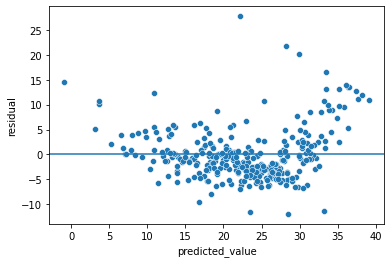

In [34]:
# calculate residuals
residual = y_train - y_pred_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_pred_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

## Training Error

In [35]:
# prepare prediction result on training data
y_pred_train = lasso_best.predict(X_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_pred_train, y_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_pred_train, y_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_pred_train, y_train)))

RMSE for training data is 5.305632515768358
MAE for training data is 3.781719674865998
MAPE for training data is 0.23633552755838005


## Testing Error

In [36]:
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_pred_test = lasso_best.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_pred_test, y_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_pred_test, y_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_pred_test, y_test)))

RMSE for testing data is 5.339676856375031
MAE for testing data is 3.573110516067264
MAPE for testing data is 0.321616327318935


In [38]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [39]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) 
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        training_errors.append(rmse_train)

        y_pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        testing_errors.append(rmse_test)
    return training_errors, testing_errors

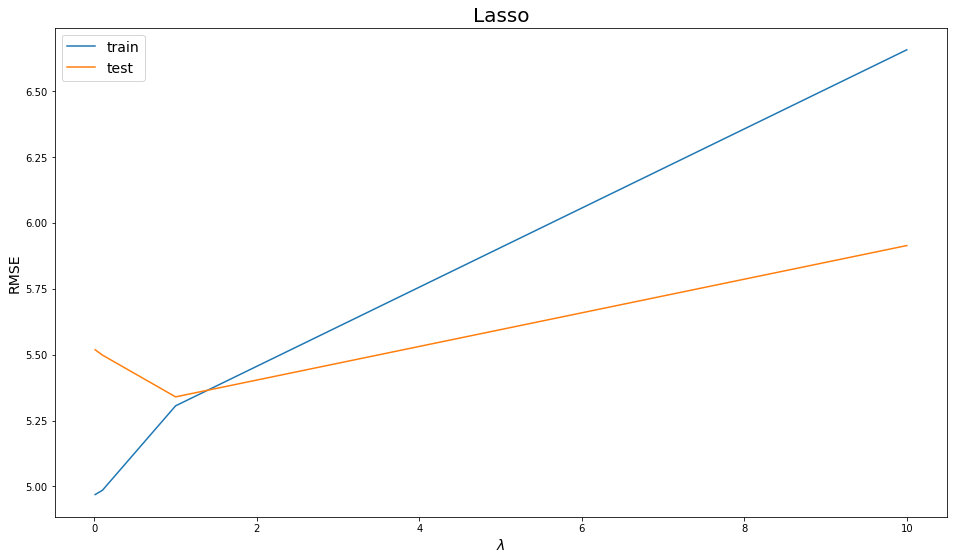

In [40]:
lasso_train, lasso_test = evaluate_model(Lasso, [0.01, 0.1, 1, 10])
plot_errors([0.01, 0.1, 1, 10], lasso_train, lasso_test, "Lasso")

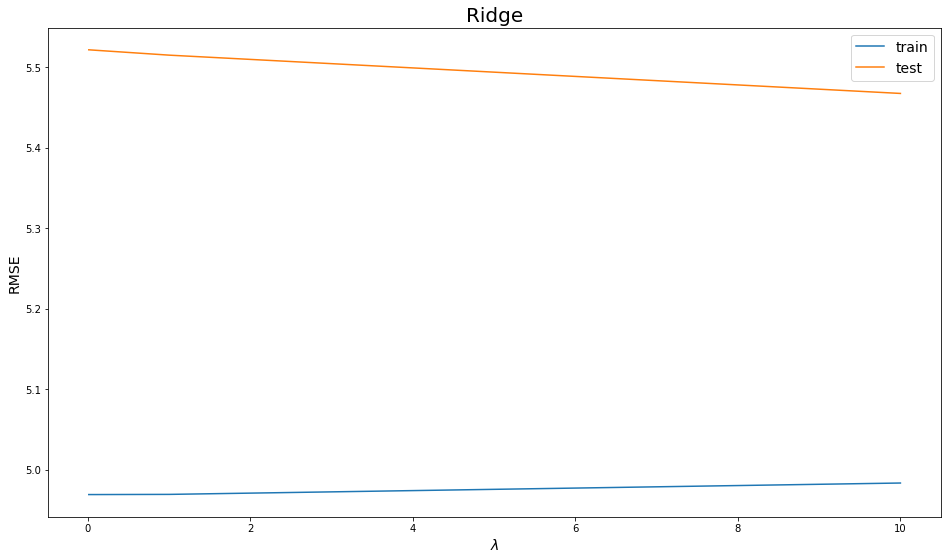

In [41]:
ridge_train, ridge_test = evaluate_model(Ridge, [0.01, 0.1, 1, 10])
plot_errors([0.01, 0.1, 1, 10], ridge_train, ridge_test, "Ridge")

increasing lambdas will add the RMSE in both train data and test data

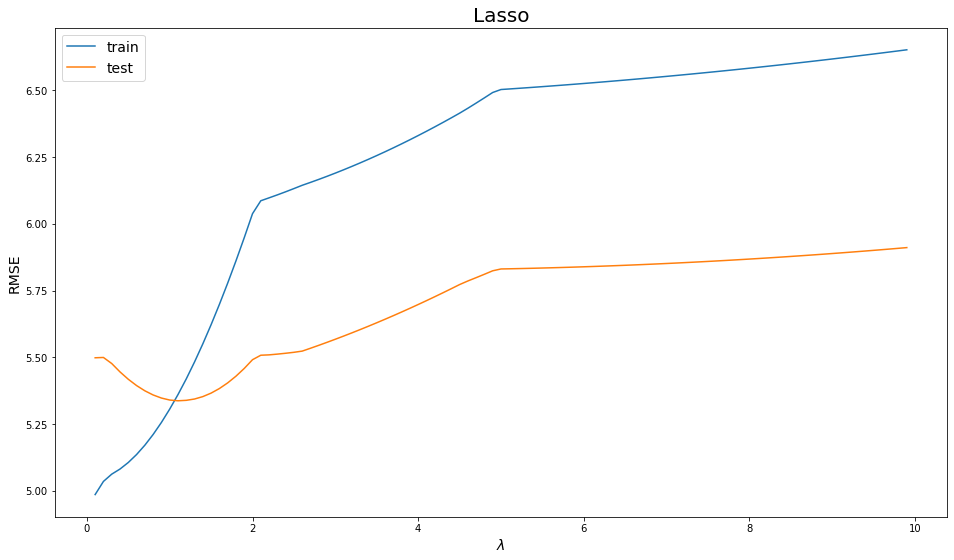

In [42]:
#make a smoother chart 
lasso_train, lasso_test = evaluate_model(Lasso, np.arange(0.1, 10, step=0.1))
plot_errors(np.arange(0.1, 10, step=0.1), lasso_train, lasso_test, "Lasso")

# Conclusion

In [43]:
coef_all_models = coef_df_linear.merge(coef_df_ridge,on='feature').merge(coef_df_lasso,on='feature')
coef_all_models.columns = ['Feature', 'Coef Linear', 'Coef Ridge', 'Coef Lasso']
coef_all_models

,Feature,Coef Linear,Coef Ridge,Coef Lasso
0,intercept,3.481221,7.694064,22.932003
1,crim,-0.051037,-0.050965,-0.029068
2,zn,-0.020126,-0.021526,-0.015391
3,chas,3.221401,2.243514,0.000000
4,rm,5.654254,5.176807,2.939989
5,tax,0.000585,0.000980,0.000073
6,ptratio,-0.842611,-0.884033,-0.806526
7,black,0.013224,0.013026,0.011677
8,lstat,-0.459381,-0.494382,-0.627457


Interpretation:
1. Ridge Regression
  - rm: rm has the largest coefficient amongst other features. 5,21 means that if rm is increasing by 1 (ex: from 1 to 2), our target value will increase by 5,21. And so on...
2. Lasso Regression
  - indus: our target value will increase by 0.00234 every time when indus value is increased by 1

1. Ridge Regression reduces the impact of features that are not important (chas, rm) in predicting our target values. Ridge reduces rm feature in a small portion, because rm feature has a largest impact in predicting target values.

2. Lasso Regression reduces Chas feature coefficient into zero. Chas feature has the lowest correlation with target feature (See the previous heat map correlation). Lasso will eliminate some features in order to make a simpler model.

  Lasso keep the rm features because it has the largest impact in predicting our model. In heat map correlation, rm has the largest correlation with target feature. In linear regression and ridge regression, rm feature also has a highest coefficient, it means that this feature has a largest impact to our target values

  When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated). 

(source: https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/)

In [44]:
models = [lr, ridge_reg_ten, lasso_reg_one]

for model in models:
  y_pred_test = model.predict(X_test)
  print('RMSE for testing data with {} model is {}'.format(model, np.sqrt(mean_squared_error(y_pred_test, y_test))))
  print('MAE for testing data with {} model is {}'.format(model, mean_absolute_error(y_pred_test, y_test)))
  print('MAPE for testing data with {} model is {}'.format(model, mean_absolute_percentage_error(y_pred_test, y_test)))
  print('-'*50)
  

RMSE for testing data with LinearRegression() model is 5.521931268637513
MAE for testing data with LinearRegression() model is 3.3848479653154677
MAPE for testing data with LinearRegression() model is 0.2619054497401888
--------------------------------------------------
RMSE for testing data with Ridge(alpha=10, random_state=42) model is 5.467602851224819
MAE for testing data with Ridge(alpha=10, random_state=42) model is 3.4007673122184543
MAPE for testing data with Ridge(alpha=10, random_state=42) model is 0.2602131597055868
--------------------------------------------------
RMSE for testing data with Lasso(alpha=1, random_state=42) model is 5.339676856375031
MAE for testing data with Lasso(alpha=1, random_state=42) model is 3.573110516067264
MAPE for testing data with Lasso(alpha=1, random_state=42) model is 0.321616327318935
--------------------------------------------------


- Lasso with alpha=1 has the lowest RMSE. Our model give a predicted values approximately +5.3 or -5.3 from actual values

- Linear Regression followed by Ridge with alpha-10 has the lowest MAE. MAE is not sensitive to outliers, it gives us a lower error than RMSE. 3.38 MAE means that our model predicted values are 3.38 from actual values

- Ridge with alpha-10 has the lowest MAPE. The mean absolute percent error (MAPE) expresses accuracy as a percentage of the error. 0.25 MAPE means our model is off by 25%




